### Imports

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.colors import BoundaryNorm

%config InlineBackend.figure_format='retina'

# Improve style
sns.set_theme(style="whitegrid")


### Load daata

In [2]:
# Load dataframe
fname = "../opt_flathv_75_1500_withBB_chroma15_footprint/fma.parquet"
df = pd.read_parquet(fname)
df


,particle_id,qx1,qy1,qx2,qy2,diffusion,normalized amplitude in xy-plane_x,angle in xy-plane [deg]_x,path 1,name 1,path 2,name 2,q1,q2,normalized amplitude in xy-plane_y,angle in xy-plane [deg]_y
0,0,0.309248,0.309248,0.000500,0.000500,-0.359881,0.5,0.9,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,madx_000,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,xsuite_000,62.316,60.321,0.5,0.9
1,1,0.309271,0.310899,0.309271,0.310899,-6.515948,0.5,15.6,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,madx_000,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,xsuite_000,62.316,60.321,0.5,15.6
2,2,0.310875,0.310863,0.310860,0.310871,-4.762167,0.5,30.3,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,madx_000,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,xsuite_000,62.316,60.321,0.5,30.3
3,3,0.310847,0.310836,0.310845,0.310838,-5.633047,0.5,45.0,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,madx_000,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,xsuite_000,62.316,60.321,0.5,45.0
4,4,0.310824,0.310823,0.310829,0.310820,-5.232750,0.5,59.7,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,madx_000,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,xsuite_000,62.316,60.321,0.5,59.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,0.325132,0.322776,0.325131,0.322778,-5.558681,10.0,30.3,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,madx_007,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,xsuite_000,62.316,60.321,10.0,30.3
66,66,0.321369,0.325990,0.321373,0.325987,-5.328967,10.0,45.0,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,madx_007,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,xsuite_000,62.316,60.321,10.0,45.0
67,67,0.319591,0.327755,0.319633,0.327697,-4.147314,10.0,59.7,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,madx_007,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,xsuite_000,62.316,60.321,10.0,59.7
68,68,0.311906,0.337633,0.306142,0.353599,-1.770202,10.0,74.4,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,madx_007,/afs/cern.ch/work/c/cdroin/private/DA_study/ma...,xsuite_000,62.316,60.321,10.0,74.4


In [3]:
# Split dataframe in four, depending on the column "name 1"
df_b1_1963_bb = df[df["name 1"] == "madx_000"]
df_b1_2116_bb = df[df["name 1"] == "madx_001"]
df_b2_1963_bb = df[df["name 1"] == "madx_002"]
df_b2_2116_bb = df[df["name 1"] == "madx_003"]

df_b1_1963_nobb = df[df["name 1"] == "madx_004"]
df_b1_2116_nobb = df[df["name 1"] == "madx_005"]
df_b2_1963_nobb = df[df["name 1"] == "madx_006"]
df_b2_2116_nobb = df[df["name 1"] == "madx_007"]


l_df = [df_b1_1963_bb, df_b2_1963_bb, df_b1_2116_bb, df_b2_2116_bb, df_b1_1963_nobb, df_b2_1963_nobb, df_b1_2116_nobb, df_b2_2116_nobb]
l_beam = ["B1_bb", "B2_bb", "B1_bb", "B2_bb", "B1_nobb", "B2_nobb", "B1_nobb", "B2_nobb"]
l_bunch = ["1963", "1963", "2116", "2116", "1963", "1963", "2116", "2116"]

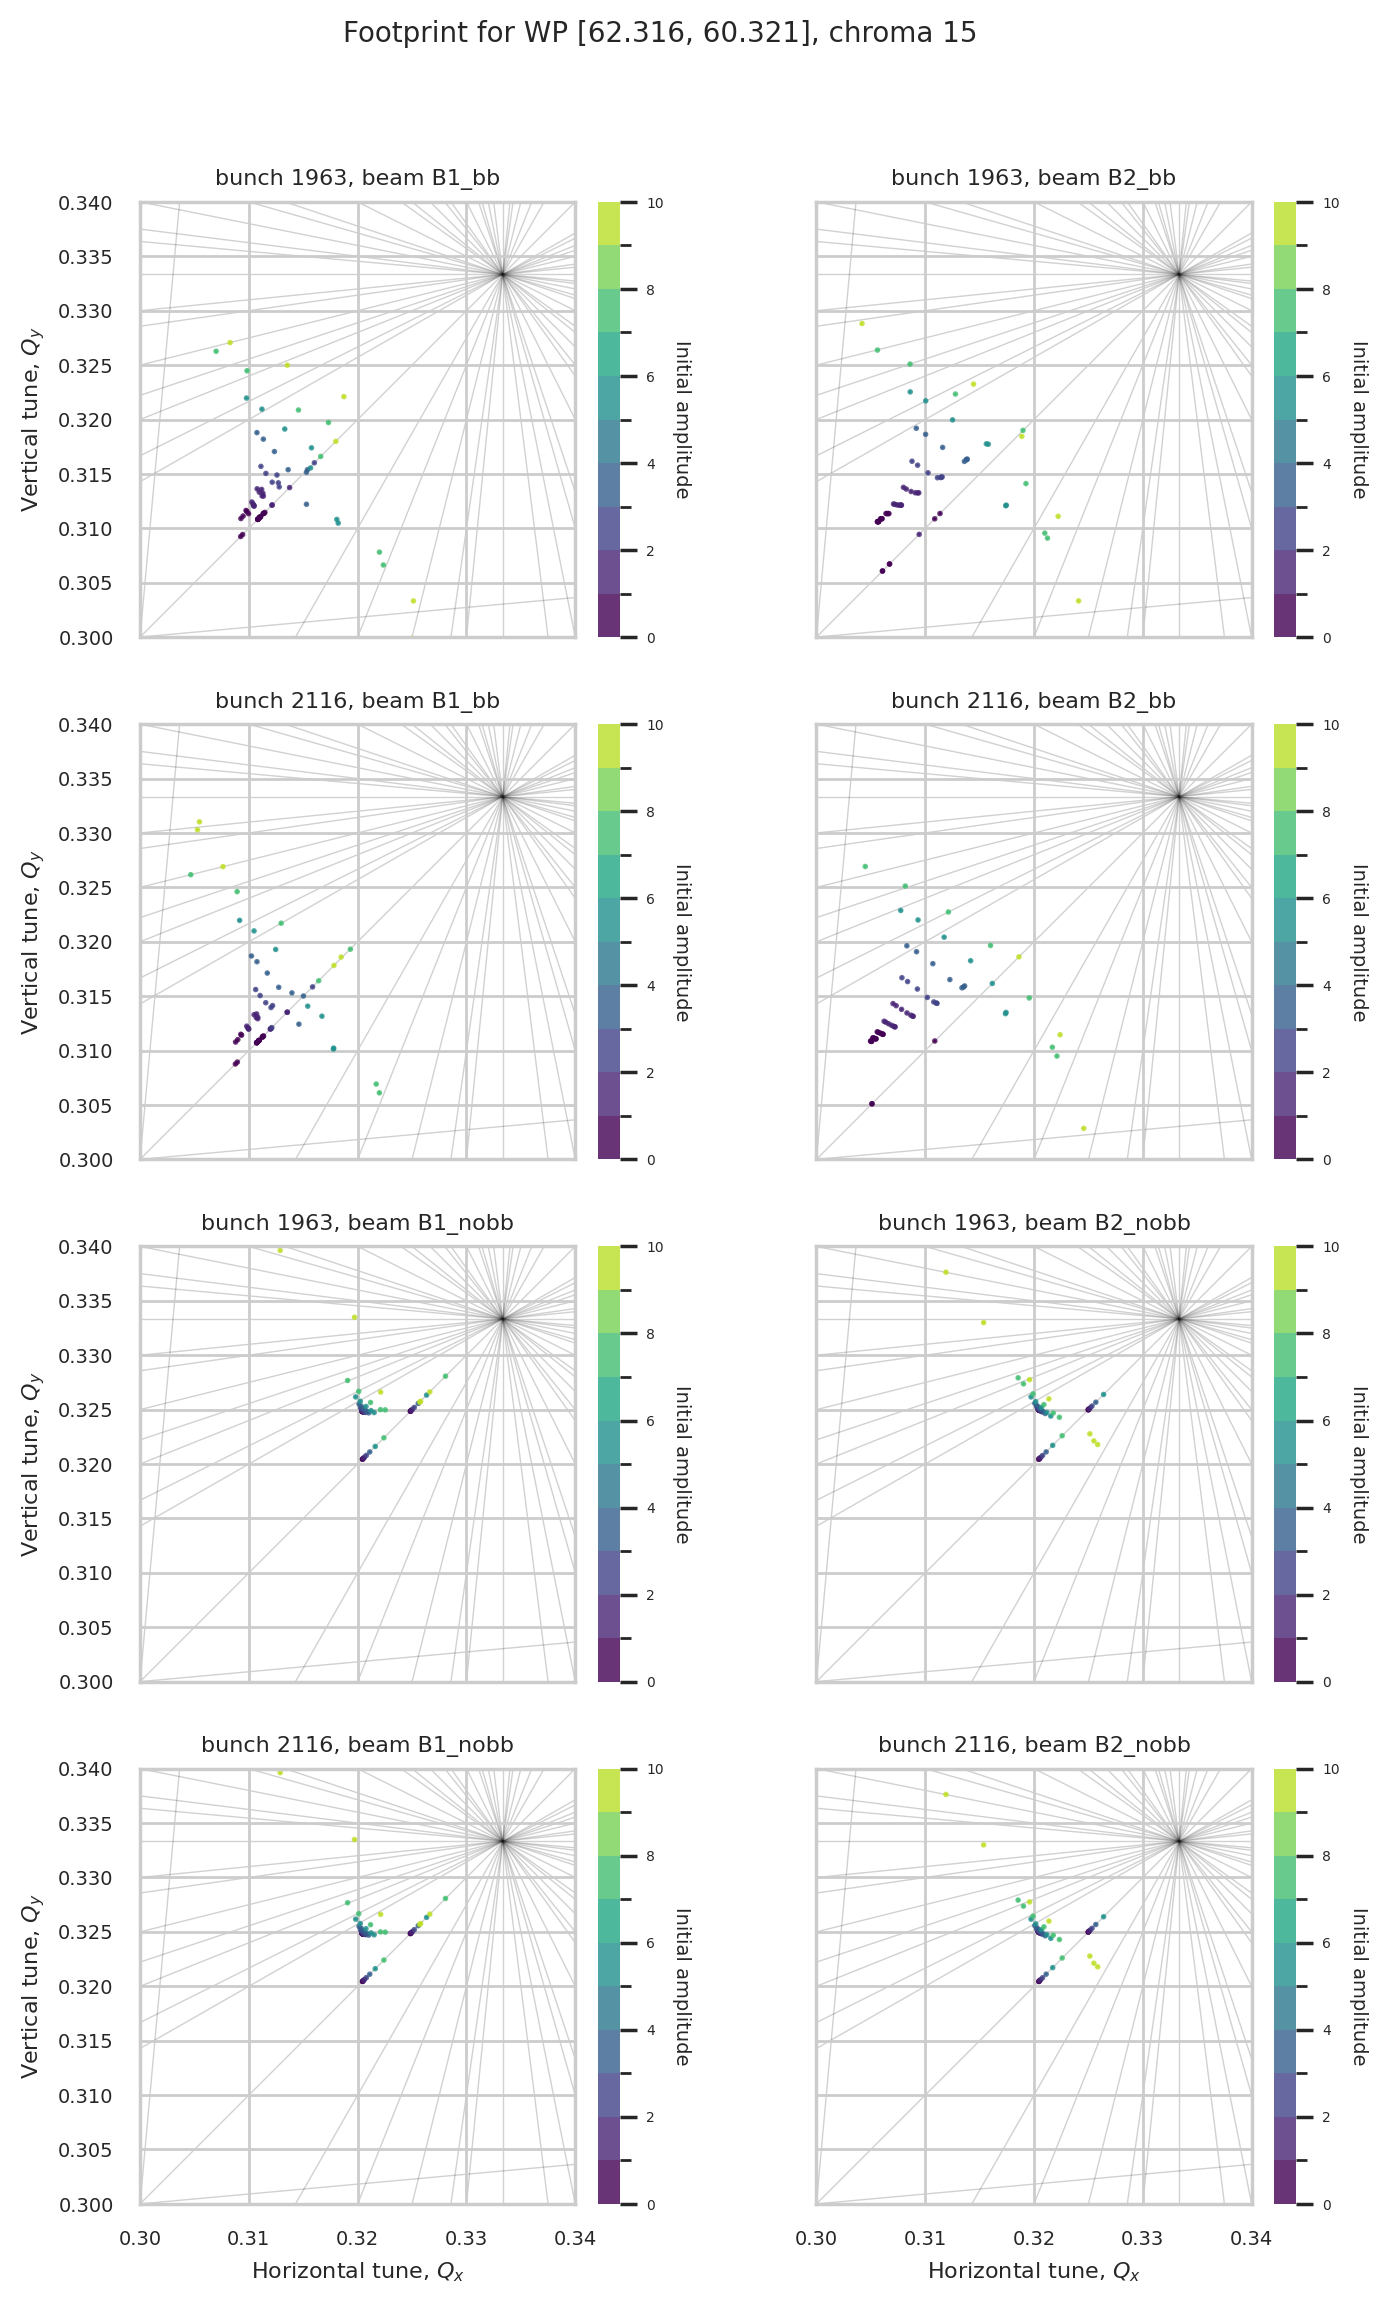

In [10]:
def plotWorkingDiagram(ax, order=12, QxRange=np.array([0, 1]), QyRange=np.array([0, 1]), **kwargs):
    # Initialization
    options = {"color": "k", "alpha": 0.5, "linewidth": 0.5}
    options.update(kwargs)
    QxRange, QyRange = np.array(QxRange), np.array(QyRange)

    def intList(n):
        return np.arange(-n, n + 1)

    ax.axis("square")
    ax.set_xlim(QxRange)
    ax.set_ylim(QyRange)

    # Creating all combinations except vertical lines
    popt = []
    for m1, m2, n in itertools.product(
        intList(order), intList(order)[intList(order) != 0], intList(200)
    ):
        if np.abs(m1) + np.abs(m2) <= order:
            popt.append((-m1 / m2, n / m2))

    # Removing Duplicates
    popt = list(set(popt))

    # Keeping only lines in ROI
    ROI_popt = []
    for slope, y0 in popt:
        line = slope * QxRange + y0

        if np.any(np.logical_and(line >= np.min(QyRange), line <= np.max(QyRange))):
            ROI_popt.append((slope, y0))

    # Plotting
    regularSlopes = np.array(ROI_popt)[:, 0]
    for slope, y0 in ROI_popt:
        ax.plot(QxRange, slope * QxRange + y0, **options)

        # Reflection around y=x to take care of the cases where m2=0
        with np.errstate(divide="ignore"):
            invertedSlope = (np.diff(QyRange) / np.diff(slope * QyRange + y0))[0]
        if not np.round(invertedSlope, 5) in list(np.round(regularSlopes, 5)):
            ax.plot(slope * QyRange + y0, QyRange, **options)


fig, arr_ax = plt.subplots(nrows=4, ncols=2, figsize=(8, 13), sharex=True, sharey=True)
plt.set_cmap("viridis")
for i, (df, beam, bunch) in enumerate(zip(l_df, l_beam, l_bunch)):
    ax = arr_ax[i // 2, i % 2]
    # We change the fontsize of minor ticks label
    ax.tick_params(axis="both", which="major", labelsize=7)
    ax.tick_params(axis="both", which="minor", labelsize=6)

    plotWorkingDiagram(
        ax,
        order=12,
        QxRange=np.array([0.25, 0.35]),
        QyRange=np.array([0.25, 0.35]),
        alpha=0.2,
        zorder=-1000,
    )
    scatter = ax.scatter(
        df["qx1"],
        df["qy1"],
        s=1.0,
        alpha=0.8,
        edgecolors=None,
        c=df["normalized amplitude in xy-plane_x"],
        norm=BoundaryNorm(boundaries=np.linspace(0, 10, 11), ncolors=int(0.9 * 256)),
    )  # , vmin=-7, vmax=-3,cmap='jet')
    # ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    # ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    if i >= 6:
        ax.set_xlabel(r"Horizontal tune, $Q_x$", fontsize=8)
    if i % 2 == 0:
        ax.set_ylabel(r"Vertical tune, $Q_y$", fontsize=8)
    ax.set_xlim(0.3, 0.34)
    ax.set_ylim(0.3, 0.34)
    # plt.axis('scaled')
    cbar = plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Initial amplitude", rotation=270, labelpad=10, fontsize=7)
    cbar.ax.tick_params(labelsize=5)
    cbar.outline.set_visible(False)

    ax.set_title(f"bunch {bunch}, beam {beam}", fontsize=8)
    # plt.tight_layout()

plt.suptitle("Xtrack footprint for WP [62.316, 60.321], chroma 15", y=0.95, fontsize=10)
# plt.tight_layout()
plt.savefig("footprint.pdf")#, dpi=300)
plt.show()
